In [114]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.applications.densenet import preprocess_input

In [115]:
from sudoku_solver import Suduko
from cropped_img import wrap_img

In [116]:
batch_size = 32
img_height = 50
img_width = 50

In [54]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "Digits",
  validation_split=0.15,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10538 files belonging to 10 classes.
Using 8958 files for training.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(2, shape=(), dtype=int32)


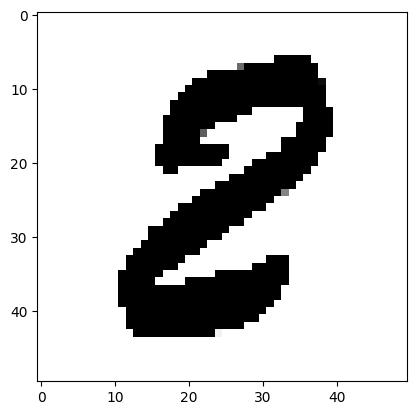

In [61]:
for image,label in train_ds.take(1):
    plt.imshow(image[0])
    print(label[0])
    break

In [56]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "Digits",
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10538 files belonging to 10 classes.
Using 1580 files for validation.


In [57]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [58]:
num_classes = 10

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(60, 5, padding = "Same", activation='relu'),
  tf.keras.layers.Conv2D(60, 5, padding = "Same",activation = "relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(30, 3, padding = "Same", activation='relu'),
  tf.keras.layers.Conv2D(30, 3, padding = "Same",activation = "relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [62]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [63]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
280/280 [==============================] - 137s 487ms/step - loss: 0.3255 - accuracy: 0.8934 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 2/3
280/280 [==============================] - 146s 520ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 3/3
280/280 [==============================] - 138s 494ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0250 - val_accuracy: 0.9943


In [65]:
model.save('myModel.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 50, 50, 60)        4560      
                                                                 
 conv2d_29 (Conv2D)          (None, 50, 50, 60)        90060     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 25, 25, 60)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 25, 25, 30)        16230     
                                                                 
 conv2d_31 (Conv2D)          (None, 25, 25, 30)        8130      
                                                      

In [117]:
model = keras.models.load_model('myModel.h5')

In [197]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=preprocess_input,
    validation_split=0.2)


train_dataset = train_datagen.flow_from_directory('Digits',
                                             batch_size=32,
                                             class_mode='categorical',
                                             subset='training',
                                             shuffle=True,
                                             target_size=(50,50))

val_dataset = train_datagen.flow_from_directory('Digits',
                                           batch_size=32,
                                           class_mode='categorical',
                                           subset='validation',
                                           shuffle=True,
                                           target_size=(50,50))

Found 8768 images belonging to 10 classes.
Found 2189 images belonging to 10 classes.


In [146]:
model_d = tf.keras.Sequential()
pretrained_model=tf.keras.applications.DenseNet201(
     input_shape=(50,50,3),
     include_top=False,
     weights='imagenet',
     pooling='avg',
)
pretrained_model.trainable = False
model_d.add(pretrained_model)
model_d.add(Dense(512,activation='relu'))
model_d.add(Dense(128,activation='relu'))
model_d.add(Dense(128,activation='relu'))
model_d.add(Dense(10,activation='softmax'))

In [147]:
model_d.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [148]:
steps_per_epoch_training = len(train_dataset)
steps_per_epoch_validation = len(val_dataset)
num_epochs = 5

In [149]:
fit_history_model = model_d.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=val_dataset,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/5


/var/folders/ry/xhpyhcs53g19njc3x6c86b3m0000gn/T/ipykernel_20731/652612663.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history_model = model_d.fit_generator(


274/274 [==============================] - 68s 227ms/step - loss: 0.2795 - accuracy: 0.9102 - val_loss: 0.1314 - val_accuracy: 0.9415
Epoch 2/5
274/274 [==============================] - 71s 258ms/step - loss: 0.0826 - accuracy: 0.9705 - val_loss: 0.1400 - val_accuracy: 0.9680
Epoch 3/5
274/274 [==============================] - 70s 255ms/step - loss: 0.0508 - accuracy: 0.9821 - val_loss: 0.2125 - val_accuracy: 0.9283
Epoch 4/5
274/274 [==============================] - 69s 250ms/step - loss: 0.0371 - accuracy: 0.9867 - val_loss: 0.1005 - val_accuracy: 0.9794
Epoch 5/5
274/274 [==============================] - 68s 248ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.2025 - val_accuracy: 0.9561


In [150]:
model_d.save('dense_net.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [215]:
model_d = keras.models.load_model('dense_net.h5')

In [216]:
img = wrap_img('a.png')

In [217]:
img.shape


(450, 450, 3)

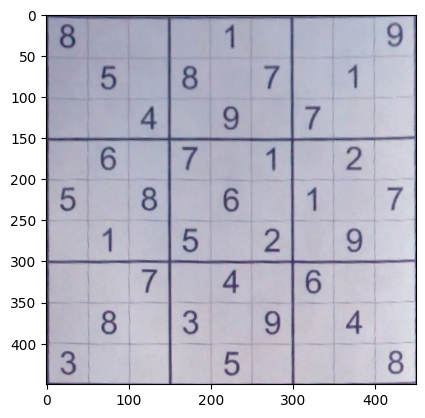

In [218]:
plt.imshow(img)

In [219]:
digit = img[0:50,0:50]
digit1 = np.expand_dims(digit,0)
digit1 = preprocess_input(digit1)
print(digit.shape,digit1.shape)

(50, 50, 3) (1, 50, 50, 3)


8


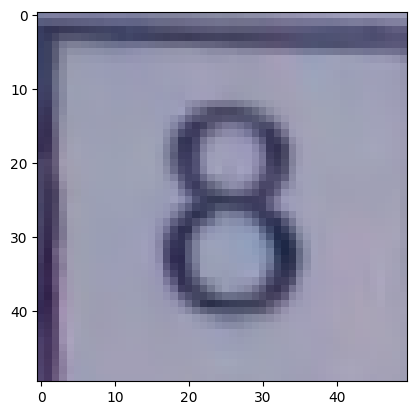

In [221]:
plt.imshow(digit)
print(np.argmax(model_d(digit1)))

In [222]:
sudo = []
# fig,axs = plt.subplots(9,9)
for j in range(9):
    for i in range(9):
        single_block = img[j*50:(j+1)*50,i*50:(i+1)*50]
        single_block = single_block[3:46,3:46]
        single_block = cv.resize(single_block,(50,50))
        # axs[j,i].imshow(single_block)
        single_block = np.expand_dims(single_block,0)
        single_block = preprocess_input(single_block)
        a = model_d.predict(single_block)
        label = np.argmax(a)
        sudo.append(label)
# plt.show()

1/1 [==============================] - 0s 33ms/step


In [223]:
sudo = np.array(sudo)
sudo.resize(9,9)
print(sudo)

[[8 1 7 7 1 1 1 1 5]
 [0 3 0 8 1 7 0 1 0]
 [0 7 4 0 5 0 7 0 0]
 [0 2 1 7 1 4 1 2 1]
 [2 0 8 0 2 0 1 0 7]
 [0 1 0 6 0 2 0 2 0]
 [1 1 7 7 4 1 2 1 0]
 [1 8 0 2 0 2 0 4 0]
 [2 0 0 0 5 0 0 0 8]]


In [192]:
def printsudoku(sudo):
    print("\n")
    for i in range(len(sudo)):
        line = ""
        if i == 3 or i == 6:
            print("---------------------")
        for j in range(len(sudo[i])):
            if j == 3 or j == 6:
                line += "| "
            line += str(sudo[i][j])+" "
        print(line)

In [193]:
printsudoku(sudo)



2 0 0 | 0 1 0 | 0 0 9 
0 6 0 | 2 0 7 | 0 1 0 
0 0 4 | 0 6 0 | 7 0 0 
---------------------
0 6 0 | 7 0 1 | 0 2 0 
5 0 8 | 0 6 0 | 1 0 7 
0 1 0 | 5 0 2 | 0 9 0 
---------------------
0 0 7 | 0 4 0 | 6 0 0 
0 2 0 | 3 0 9 | 0 4 0 
3 0 0 | 0 5 0 | 0 0 8 


In [194]:
if(Suduko(sudo,0,0)):
    printsudoku(sudo)
else:
    print("Solution does not exist:(")

Solution does not exist:(
